In [3]:
import numpy as np
import ImShow as I
import matplotlib.pyplot as plt
from collections import Counter
import pickle

# Utitility functions
## plot an image

In [51]:
def plot_image(data):
    if len(data.shape) < 2:
        one_pic = data.reshape((28,28))
    else:
        one_pic = data
    plt.imshow(one_pic,cmap='gray')
    plt.show()
    

# Prepare Data set MNIST
## Pure MNIST number 4

x_train.shape=(60000, 784),x_test.shape=(10000, 784)
x_train_4.shape=(5842, 784), x_test_4.shape=(982, 784)
y_train_4.shape=(5842,)
x_train_mix.shape=(6157, 784), train_len_n4=315
y_train_mix.counter=Counter({4: 5842, 2: 41, 8: 41, 9: 41, 1: 40, 3: 38, 7: 37, 6: 29, 0: 26, 5: 22}), train_len_n4=315
test_n4_id=[ 621 8115 3870 2698 5203 4766 2205 8684 4288 8411 1070 4456 4479 4154
 6476 5866  144 6385 3374 1897 3146 2420  586 7883 7823 5115 1032 4685
 8168 3252 4976 4351 4952 4145 6018 6798 3136  635  977 3292 1151 8481
 6922 1529 6879  392 3670 7198 3861 4230 4092 2527 2835]
y_test_mix.counter=Counter({4: 982, 3: 11, 9: 8, 0: 7, 1: 7, 6: 6, 7: 6, 2: 3, 8: 3, 5: 2}), train_len_n4=315
6


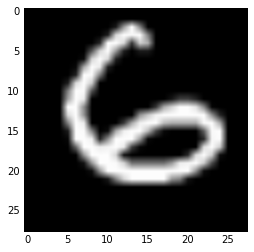

In [72]:
import tensorflow as tf
mnist =tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape((-1,784,))
x_test = x_test.reshape((-1,784,))
print("x_train.shape={},x_test.shape={}".format(x_train.shape, x_test.shape))
# Get only number 4
x_train_4 = x_train[y_train==4]
y_train_4 = y_train[y_train==4]

x_train_n4 = x_train[y_train!=4]
y_train_n4 = y_train[y_train!=4]

x_test_4 = x_test[y_test==4]
y_test_4 = y_test[y_test==4]

x_test_n4 = x_test[y_test != 4]
y_test_n4 = y_test[y_test !=4]

print("x_train_4.shape={}, x_test_4.shape={}".format(x_train_4.shape, x_test_4.shape))
print("y_train_4.shape={}".format(y_train_4.shape))
# pure training data set with number 4, for semi-supervised training.
np.savez('mnist_4.npz', x_train=x_train_4, y_train=y_train_4, x_test=x_test_4, y_test=y_test_4)
#mnist_4 = {'train':{"x":x_train_4, "y":y_train_4}, 'test':{"x":x_test_4, 'y':y_test_4}}

# mixed training data set with number 4 and a k ratio of other numbers
k = 5.4 
train_len_n4 = int(k/100. * len(x_train_4))
test_len_n4 = int(k/100. * len(x_test_4))

train_n4_id = np.random.choice(range(len(x_train_n4)), train_len_n4)
x_train_mix = np.vstack((x_train_4, x_train_n4[train_n4_id]))
y_train_mix = np.concatenate((y_train_4, y_train_n4[train_n4_id]))
print("x_train_mix.shape={}, train_len_n4={}".format(x_train_mix.shape, train_len_n4))
print("y_train_mix.counter={}, train_len_n4={}".format(Counter(y_train_mix), train_len_n4))


test_n4_id = np.random.choice(range(len(x_test_n4)), test_len_n4)
print("test_n4_id={}".format(test_n4_id))
x_test_mix = np.vstack((x_test_4, x_test_n4[test_n4_id]))
y_test_mix = np.concatenate((y_test_4, y_test_n4[test_n4_id]))

print("y_test_mix.counter={}, train_len_n4={}".format(Counter(y_test_mix), train_len_n4))

print(y_test_mix[-2])
plot_image(x_test_mix[-2])
np.savez('mnist_4_mix.npz', x_train=x_train_mix, y_train=y_train_mix, x_test=x_test_mix, y_test=y_test_mix)
#mnist_4_mix = {'train':{'x':x_train_mix, 'y':y_train_mix}, 'test':{'x':x_test_mix, 'y':y_test_mix}}

(784,)


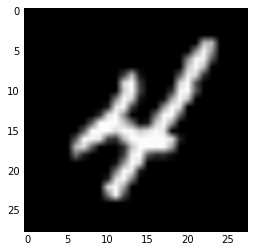

In [53]:
print(x_train_4[1].shape)
plot_image(x_train_4[1])

### Load and test saved data set

In [54]:
data =  np.load(r"mnist_4.npz", allow_pickle=True)
x_train_4 = data['x_train']
y_train_4 = data['y_train']
x_test_4 = data['x_test'] 
y_test_4 = data['y_test'] 
print(y_test_4[-50:])

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [69]:
import random
a = np.array([1,2,3,5,2.3, 23,12,13.2])
valid_ids = random.sample(range(len(a)), 3)
mask_a = np.ones(a.shape, dtype=bool)
mask_a[valid_ids] = False
print(mask_a)
print(valid_ids)
valid_a = a[valid_ids]
train_a = a[mask_a]
print(valid_a)
print(train_a)

[False False False  True  True  True  True  True]
[2, 0, 1]
[3. 1. 2.]
[ 5.   2.3 23.  12.  13.2]


## Important update: the .npk file has been updated to python3 version
## .txt file and .npk file contain the exactly same data


In [4]:
data = np.load("data.npk", allow_pickle=True)
y = np.load("y.npk", allow_pickle=True)
print (data.shape)
print (y.shape)
print (Counter(y.reshape(y.size)))

(5124, 784)
(5124,)
Counter({4.0: 4859, 0.0: 35, 7.0: 34, 9.0: 34, 2.0: 29, 5.0: 28, 6.0: 28, 8.0: 27, 1.0: 25, 3.0: 25})


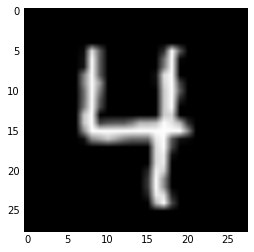

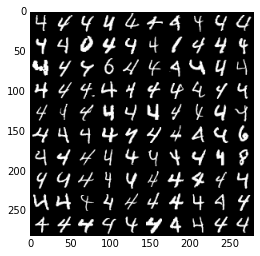

In [5]:
one_pic = data[0].reshape(28,28)
plt.imshow(one_pic,cmap='gray')
plt.show()
Xpic = I.tile_raster_images(X = data, img_shape=(28,28), tile_shape=(10,10))
plt.imshow(Xpic,cmap='gray')
plt.show()

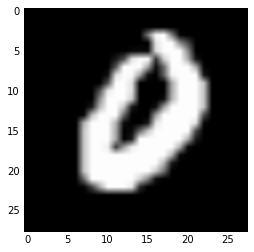

In [8]:
twelfth_pic = data[12].reshape(28,28)
plt.imshow(twelfth_pic,cmap='gray')
plt.show()

In [4]:
data = np.loadtxt("data.txt",delimiter=",")
y = np.loadtxt("y.txt",delimiter=",")
print (data.shape)
print (y.shape)
print (Counter(y.reshape(y.size)))

(5124, 784)
(5124,)
Counter({4.0: 4859, 0.0: 35, 9.0: 34, 7.0: 34, 2.0: 29, 6.0: 28, 5.0: 28, 8.0: 27, 1.0: 25, 3.0: 25})


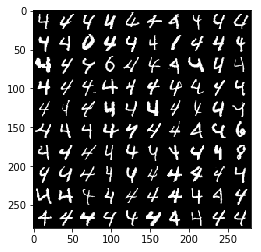

In [5]:
Xpic = I.tile_raster_images(X = data, img_shape=(28,28), tile_shape=(10,10))
plt.imshow(Xpic,cmap='gray')
plt.show()

# KDD data set


In [83]:
import pickle
with open('kdd_processed.pkl', 'rb') as f:
    proc_data = pickle.load(f)
    x_train = proc_data['x_train']
    y_train = proc_data['y_train']
    x_valid = proc_data['x_valid']
    y_valid = proc_data['y_valid']
    x_test = proc_data['x_test']
    y_test = proc_data['y_test']
print(Counter(y_train))    
print(Counter(y_valid))    
print(Counter(y_test))

Counter({0: 198361})
Counter({0: 19829})
Counter({0: 198382, 1: 48629})


# Arrythmia 

In [93]:
import scipy.io
data = scipy.io.loadmat("arrhythmia.mat")
full_x_data = data["X"]
full_y_data = data['y']
print("x.shape={}".format(full_x_data.shape))
arry_y = np.reshape(full_y_data, [len(full_y_data),])
print(arry_y.shape)
print(Counter(arry_y))

x.shape=(452, 274)
(452,)
Counter({0: 386, 1: 66})
